# UC San Diego: Neural Data Science
## Depression Severity Reflected in Brain Structure

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Names

- Jett Ngo
- Rasheed Mirza
- Valen Potloff
- Huabo Min

# Overview

The dataset from OpenNeuro was filtered and cleaned to only include 20-40 year old males. Measures of central tendency, density of CES_D scores, and intensity of average MRI scans from each session were calculated and visualized. To measure significance, numerous t-tests were used and a linear regression model was trained. Then, the findings and results were discussed to conclude whether or not an intervention played a role in reducing depression due to hippocampus activity, and whether or not it was significant.

<a id='research_question'></a>
# Research Question

How are different levels of depression severity in CES-D scores reflected in brain imaging data in males aged 20-40?


<a id='background'></a>

## Background & Prior Work

With the recent rise in concern for mental health, people have been coming forward with their struggles with depression. This has led to many studies being conducted on those with depression and a lot of data being gathered. Through this data, researchers have found links between depression and parts of the brain, both structural and functional, but have yet to fully understand the intricacies of this relationship (Wang, 2024). In fact, due to this lack of understanding, doctors can sometimes mistake symptoms of a different illness as that of major depressive disorder (MDD), which is what happened to one of our members, Jett. As is common with most mental illnesses, MDD comes in varying severities and being able to recognize how severe a patient's MDD is can be crucial in the proper treatment of it.

Recent neuroimaging studies have made advancement in identifying neural correlations with MDD particularly through resting-state functional connectivity and structural MRI analysis. For instance, Meta-analyses have revealed reduced connectivity in frontoparietal control systems in depressed individuals compared to healthy groups, highlighting dysfunction in cognitive control networks (Dunlop, 2020). Additionally, structural MRI studies have consistently reported smaller volumes of the hippocampus and cortical thinning in mood-processing regions among depressed patients. While previous fMRI studies have provided insights into hippocampal function and memory processing in depressed individuals (Werner, 2009), further research is needed to find out how these neural alterations related to depression severity and treatment outcomes.


References (include links):
- 1) [Neuroimaging Advances for Depression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6132047/)
- 2) [Brain activation during memory retrieval is associated with depression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7783190/)
- 3) [The impact of stress and major depressive disorder on Hippocampal and Medial Prefrontal Cortex Morphology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6380948/)
- 4) [Lifetime Exposure to Depression and Neuroimaging Measures of Brain Structure and Function](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10877455/#:~:text=This%20study%20found%20an%20association,imaging%20findings%20in%20the%20literature.)


CES_D scores: 0 to 60

15+ is risk of depression

# Hypothesis


Null: There is no difference in the CES-D scores or activity in the hippocampus before and after the intervention.

Alternative: There is a difference in the CES-D scores and activity in the hippocampus before and after the intervention, with an expectation of a decrease after the intervention due to increased activity in the hippocampus.

# Dataset(s)

Dataset Name: A Two-Week Running Intervention Reduces Symptoms Related to Depression and Increases Hippocampal Volume in Young Adults
- Link to the dataset: https://openneuro.org/datasets/ds003799/versions/2.0.0
- Number of observations (we used): 19

The dataset is from a study that included two groups of participants who were tested at three time points of assessment. The first group received the running intervention between the first and second time points and the second group received it between the second and third time points. 48 participants completed all required MRI scans and psychometric assessments and participated in the running intervention, of which 19 are male.

# Data Wrangling

* I first installed or imported any libraries needed to manipulate, interact, and download the dataset.
* Then I used the openneuro-py library to download the dataset from OpenNeuro remotely

In [ ]:
# This will ensure that NumPy, Pandas, and Matplotlib are installed.
try:
    import numpy
    print('numpy already installed')
except ImportError as e:
    !pip install numpy
try:
    import pandas
    print('pandas already installed')
except ImportError as e:
    !pip install pandas
try:
    import matplotlib
    print('matplotlib already installed')
except ImportError as e:
    !pip install matplotlib

# Install client for accessing dataset
!pip install openneuro-py

# Import our plotting package from matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Statistic packages
from scipy.stats import ttest_ind
import seaborn as sns
!pip install statsmodels
import statsmodels.api as sm
import seaborn as sns

#MRI viewing packages
!pip install nibabel
import nibabel as nib
!pip install nilearn
from nilearn import plotting

# Import pandas for working with databases

import pandas as pd
import numpy as np
import nibabel as nib



numpy already installed
pandas already installed
matplotlib already installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 653.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 68.3 MB/s eta 0:00:00


In [ ]:
!openneuro-py download --dataset=ds003799 --target-dir=data/

Streaming output truncated to the last 5000 lines.

sub-season101_ses-3_acq-MPrageHiRes_T1w.json:   0% 0.00/2.06k [00:00<?, ?B/s]

sub-season101_ses-1_acq-MPrageHiRes_T1w.nii.gz:   3% 372k/12.7M [00:00<00:05, 2.47MB/s]

sub-season102_ses-1_acq-MPrageHiRes_T1w.json:   0% 0.00/2.13k [00:00<?, ?B/s]


sub-season101_ses-2_acq-MPrageHiRes_T1w.nii.gz:   0% 0.00/13.3M [00:00<?, ?B/s]

                                                                             
sub-season101_ses-1_acq-MPrageHiRes_T1w.nii.gz:   6% 746k/12.7M [00:00<00:04, 3.12MB/s]


sub-season101_ses-2_acq-MPrageHiRes_T1w.nii.gz:   2% 272k/13.3M [00:00<00:04, 2.77MB/s]
sub-season101_ses-1_acq-MPrageHiRes_T1w.nii.gz:  14% 1.74M/12.7M [00:00<00:01, 6.17MB/s]


sub-season101_ses-2_acq-MPrageHiRes_T1w.nii.gz:   8% 1.11M/13.3M [00:00<00:02, 6.34MB/s]
sub-season101_ses-3_acq-MPrageHiRes_T1w.nii.gz:  14% 1.81M/12.7M [00:00<00:01, 6.79MB/s]

sub-season101_ses-1_acq-MPrageHiRes_T1w.nii.gz:  26% 3.26M/12.7M [00:00<00:01, 9.74MB/s]


su

# Data Cleaning

* My first step was to extract the participants information into a pandas dataframe
* Then I kept only males(between 20-40) as that is the demographic we want to study
* Then I split the males into their respective groups based on the study
* Lastly, I retrieved the path names for the mri files for each male and divided them by their group and session number

In [ ]:
participants_df = pd.read_csv('data/participants.tsv', sep='\t')
severity_df = pd.read_csv('data/phenotype/CES-D.tsv', sep='\t')
#get males only
males = participants_df[participants_df.sex == "M"]
male_severity_df = severity_df[participants_df.sex == "M"]
#sort id into group 1 or 2
group1_df = males[males.group == 1]
group2_df = males[males.group == 2]
#get severities
group1_severity_df = male_severity_df[participants_df.group == 1]
group2_severity_df = male_severity_df[participants_df.group == 2]

#sort mri scans into groups
#Group1 mri pathnames
group1_session1_mri = []
for participant in group1_df.participant_id:
  path_name = 'data/{id}/ses-1/anat/{id}_ses-1_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group1_session1_mri += [path_name]


group1_session2_mri = []
for participant in group1_df.participant_id:
  path_name = 'data/{id}/ses-2/anat/{id}_ses-2_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group1_session2_mri += [path_name]

group1_session3_mri = []
for participant in group1_df.participant_id:
  path_name = 'data/{id}/ses-3/anat/{id}_ses-3_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group1_session3_mri += [path_name]

# Group2 mri pathnames
group2_session1_mri = []
for participant in group2_df.participant_id:
  path_name = 'data/{id}/ses-1/anat/{id}_ses-1_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group2_session1_mri += [path_name]

group2_session2_mri = []
for participant in group2_df.participant_id:
  path_name = 'data/{id}/ses-2/anat/{id}_ses-2_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group2_session2_mri += [path_name]

group2_session3_mri = []
for participant in group2_df.participant_id:
  path_name = 'data/{id}/ses-3/anat/{id}_ses-3_acq-MPrageHiRes_T1w.nii.gz'.format(id = participant)
  group2_session3_mri += [path_name]



<ipython-input-3-b060cea0a3a0>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_severity_df = male_severity_df[participants_df.group == 1]
<ipython-input-3-b060cea0a3a0>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_severity_df = male_severity_df[participants_df.group == 2]


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data anlayses (EDA) you did after the basic cleaning.

  participant_id  group  age sex  size  weight
0  sub-season101      1   22   F  1.62      61
1  sub-season102      1   20   M  1.75      60
2  sub-season103      1   20   F  1.71      63
3  sub-season104      1   23   F  1.69      63
4  sub-season105      1   24   F  1.60      62
   participant_id  CES-D_1  CES-D_2  CES-D_3
43  sub-season213      5.0      6.0     10.0
44  sub-season214      6.0      1.0      3.0
45  sub-season215     14.0     21.0     18.0
46  sub-season216     29.0     30.0     17.0
47  sub-season217      8.0      6.0      7.0
           group        age       size     weight
count  48.000000  48.000000  48.000000  48.000000
mean    1.562500  22.979167   1.710000  67.145833
std     0.501328   2.832108   0.081606  10.728744
min     1.000000  19.000000   1.570000  50.000000
25%     1.000000  21.000000   1.645000  60.000000
50%     2.000000  23.000000   1.695000  64.000000
75%     2.000000  24.000000   1.782500  75.000000
max     2.000000  33.000000   1.910000  90.00000

<ipython-input-4-d302721c75f6>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_severity_df['group'] = 1
<ipython-input-4-d302721c75f6>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_severity_df['group'] = 2


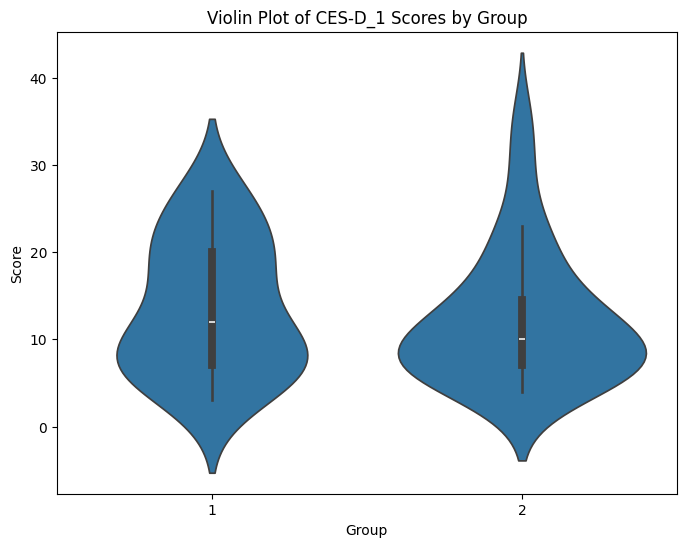

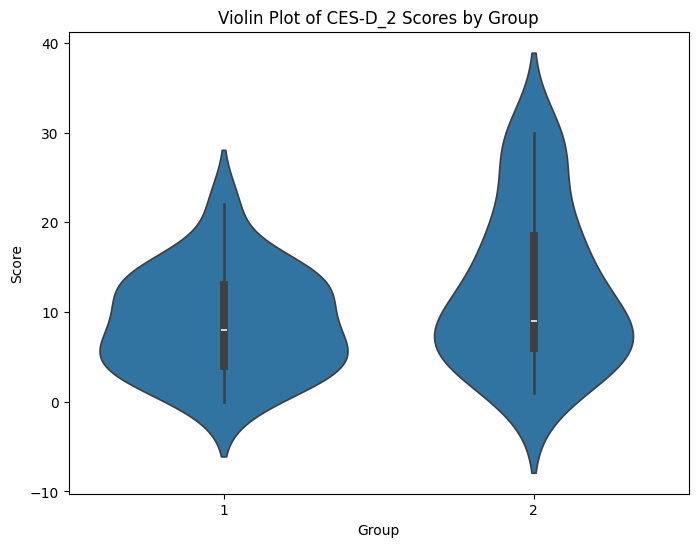

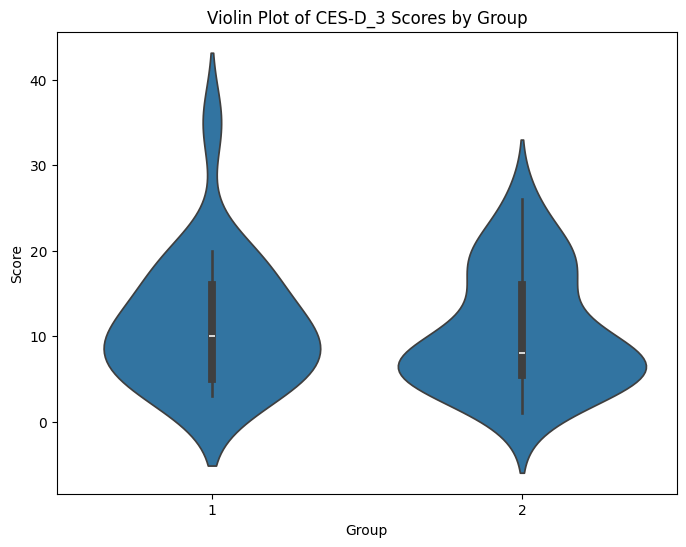

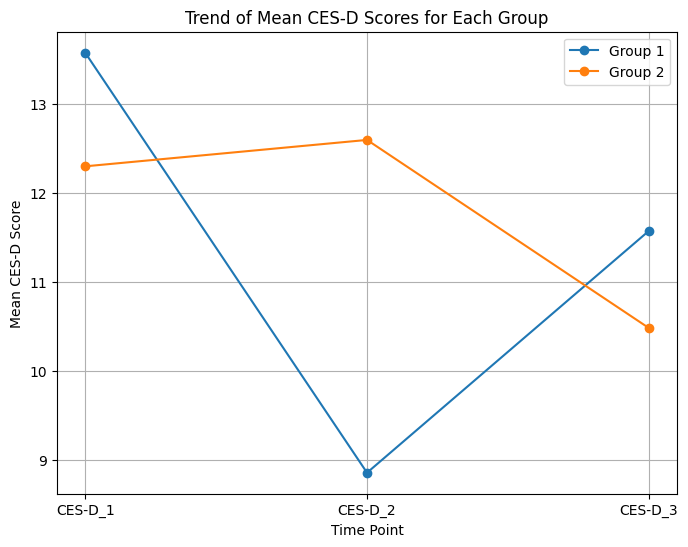

In [ ]:
#data attributes
print(participants_df.head())
print(severity_df.tail())

print(participants_df.describe())
print(severity_df.describe())

print(participants_df.columns)
print(severity_df.columns)

print(participants_df.info())
print(severity_df.info())



#central tendency

# stats group1
mean_1_group1 = group1_severity_df['CES-D_1'].mean()
median_1_group1 = group1_severity_df['CES-D_1'].median()
mode_1_group1 = group1_severity_df['CES-D_1'].mode()[0]
range_1_group1 = group1_severity_df['CES-D_1'].max() - group1_severity_df['CES-D_1'].min()

mean_2_group1 = group1_severity_df['CES-D_2'].mean()
median_2_group1 = group1_severity_df['CES-D_2'].median()
mode_2_group1 = group1_severity_df['CES-D_2'].mode()[0]
range_2_group1 = group1_severity_df['CES-D_2'].max() - group1_severity_df['CES-D_2'].min()

mean_3_group1 = group1_severity_df['CES-D_3'].mean()
median_3_group1 = group1_severity_df['CES-D_3'].median()
mode_3_group1 = group1_severity_df['CES-D_3'].mode()[0]
range_3_group1 = group1_severity_df['CES-D_3'].max() - group1_severity_df['CES-D_3'].min()

# stats group2
mean_1_group2 = group2_severity_df['CES-D_1'].mean()
median_1_group2 = group2_severity_df['CES-D_1'].median()
mode_1_group2 = group2_severity_df['CES-D_1'].mode()[0]
range_1_group2 = group2_severity_df['CES-D_1'].max() - group2_severity_df['CES-D_1'].min()

mean_2_group2 = group2_severity_df['CES-D_2'].mean()
median_2_group2 = group2_severity_df['CES-D_2'].median()
mode_2_group2 = group2_severity_df['CES-D_2'].mode()[0]
range_2_group2 = group2_severity_df['CES-D_2'].max() - group2_severity_df['CES-D_2'].min()

mean_3_group2 = group2_severity_df['CES-D_3'].mean()
median_3_group2 = group2_severity_df['CES-D_3'].median()
mode_3_group2 = group2_severity_df['CES-D_3'].mode()[0]
range_3_group2 = group2_severity_df['CES-D_3'].max() - group2_severity_df['CES-D_3'].min()

# group1, D_1 2 3 mean median mode range
print(f"Group 1 CES-D_1 scores: Mean = {mean_1_group1}, Median = {median_1_group1}, Mode = {mode_1_group1}, Range = {range_1_group1}")
print(f"Group 1 CES-D_2 scores: Mean = {mean_2_group1}, Median = {median_2_group1}, Mode = {mode_2_group1}, Range = {range_2_group1}")
print(f"Group 1 CES-D_3 scores: Mean = {mean_3_group1}, Median = {median_3_group1}, Mode = {mode_3_group1}, Range = {range_3_group1}")
# group2, D_1 2 3
print(f"Group 2 CES-D_1 scores: Mean = {mean_1_group2}, Median = {median_1_group2}, Mode = {mode_1_group2}, Range = {range_1_group2}")
print(f"Group 2 CES-D_2 scores: Mean = {mean_2_group2}, Median = {median_2_group2}, Mode = {mode_2_group2}, Range = {range_2_group2}")
print(f"Group 2 CES-D_3 scores: Mean = {mean_3_group2}, Median = {median_3_group2}, Mode = {mode_3_group2}, Range = {range_3_group2}")

group1_severity_df['group'] = 1
group2_severity_df['group'] = 2


#merge group1 and 2
combined_df = pd.concat([group1_severity_df, group2_severity_df])

merged_df = participants_df.merge(severity_df, on='participant_id')


#violin plot
for ces_d in ['CES-D_1', 'CES-D_2', 'CES-D_3']:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='group', y=ces_d, data=merged_df)
    plt.title(f'Violin Plot of {ces_d} Scores by Group')
    plt.xlabel('Group')
    plt.ylabel('Score')
    plt.show()


mean_scores_df = merged_df.groupby('group')[['CES-D_1', 'CES-D_2', 'CES-D_3']].mean().transpose()

#line graph of means
plt.figure(figsize=(8, 6))
plt.plot(mean_scores_df[1], marker='o', label='Group 1')
plt.plot(mean_scores_df[2], marker='o', label='Group 2')
plt.title('Trend of Mean CES-D Scores for Each Group')
plt.xlabel('Time Point')
plt.ylabel('Mean CES-D Score')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()







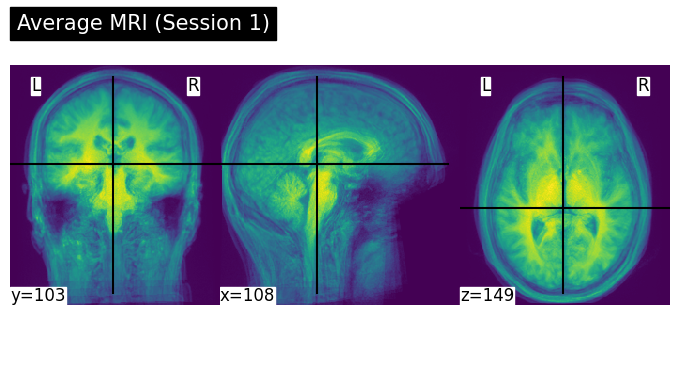

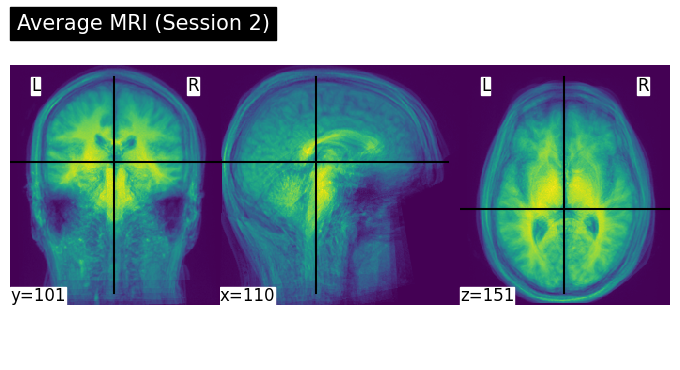

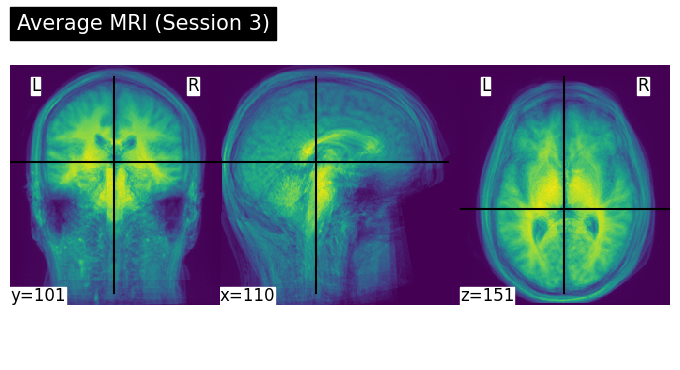

In [ ]:
def get_average_mri(mri_paths):
    mri_data = [nib.load(path).get_fdata() for path in mri_paths]
    average_mri_data = np.mean(mri_data, axis=0)
    return nib.Nifti1Image(average_mri_data, np.eye(4))

#average of MRI group 1
average_mri_session1 = get_average_mri(group1_session1_mri)
average_mri_session2 = get_average_mri(group1_session2_mri)
average_mri_session2 = get_average_mri(group1_session3_mri)

#plotting group 1 average MRI
plotting.plot_img(average_mri_session1, title='Average MRI (Session 1)')
plotting.plot_img(average_mri_session2, title='Average MRI (Session 2)')
plotting.plot_img(average_mri_session2, title='Average MRI (Session 3)')
plotting.show()


# Data Analysis & Results

Convolutioanl Neutral Networks (CNN) for Depression Severity Prediction

*   Motivation: CNNs are ideal for proprocessing 3D MRI data due to their ability to capture spatial hierarchies. We plan to use CNNs here from brain images for predicting depression severity (CES-D scores), aiming to identify neural alterations associated with depression.
*   CNN Architecture
  1.   Conv3D Layers: Extract features from 3D MRI data.
  2.   MaxPooling3D Layers: Reduce spatial dimensions and computational load.
  3.Flatten Layer: Converts 3D data into a 1D vector.
  4.Dense and Dropout Layers: Learn complex relationships and prevent overfitting
  5.Dense and Dropout Layers: Learn complex relationships and Output Layer: Predicts CES-D scores.





In [5]:
import nibabel as nib
from nilearn.input_data import NiftiMasker
from nilearn.image import resample_img, load_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import matplotlib.pyplot as plt

# Load participant and severity data
participants_df = pd.read_csv('data/participants.tsv', sep='\t')
severity_df = pd.read_csv('data/phenotype/CES-D.tsv', sep='\t')

# Get males only
males = participants_df[participants_df['sex'] == "M"]
male_severity_df = severity_df[participants_df['sex'] == "M"]

# Sort into groups
group1_df = males[males['group'] == 1]
group2_df = males[males['group'] == 2]

group1_severity_df = male_severity_df.loc[participants_df['group'] == 1]
group2_severity_df = male_severity_df.loc[participants_df['group'] == 2]

# Sort MRI scans into groups
group1_session1_mri = ['data/{id}/ses-1/anat/{id}_ses-1_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group1_df['participant_id']]
group1_session2_mri = ['data/{id}/ses-2/anat/{id}_ses-2_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group1_df['participant_id']]
group1_session3_mri = ['data/{id}/ses-3/anat/{id}_ses-3_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group1_df['participant_id']]
group2_session1_mri = ['data/{id}/ses-1/anat/{id}_ses-1_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group2_df['participant_id']]
group2_session2_mri = ['data/{id}/ses-2/anat/{id}_ses-2_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group2_df['participant_id']]
group2_session3_mri = ['data/{id}/ses-3/anat/{id}_ses-3_acq-MPrageHiRes_T1w.nii.gz'.format(id=participant) for participant in group2_df['participant_id']]

Resample MRI Data with reduced dimensions

In [9]:
# Function to resample MRI data to a common space with reduced dimensions
def resample_to_target_shape(img, target_shape=(64, 64, 64)):
    target_affine = np.eye(4)  # Identity matrix for affine
    return resample_img(img, target_affine=target_affine, target_shape=target_shape)

# Load and resample MRI data
g1s1_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group1_session1_mri])
g1s2_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group1_session2_mri])
g1s3_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group1_session3_mri])
g2s1_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group2_session1_mri])
g2s2_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group2_session2_mri])
g2s3_data = np.array([resample_to_target_shape(load_img(path)).get_fdata() for path in group2_session3_mri])

# Verify the shapes of the MRI data
print(f"Group 1 Session 1 data shape: {g1s1_data.shape}")

# Combine MRI data for standardization
full_data = np.concatenate((g1s1_data, g1s2_data, g1s3_data, g2s1_data, g2s2_data, g2s3_data), axis=0)

# Create model for flattening and standardizing images
masker = NiftiMasker(mask_strategy='background', standardize=True)
masker.fit([nib.Nifti1Image(img, np.eye(4)) for img in full_data])

# Flatten and standardize
flattened_data = masker.transform([nib.Nifti1Image(img, np.eye(4)) for img in full_data])

# Combine CES-D scores
all_severity_scores = np.concatenate([
    group1_severity_df['CES-D_1'].values,
    group1_severity_df['CES-D_2'].values,
    group1_severity_df['CES-D_3'].values,
    group2_severity_df['CES-D_1'].values,
    group2_severity_df['CES-D_2'].values,
    group2_severity_df['CES-D_3'].values
])

# Ensure the number of MRI scans matches the number of severity scores
assert len(full_data) == len(all_severity_scores), "Mismatch between MRI scans and severity scores"

# Reshape flattened data back to 3D shape for CNN
expected_elements_per_scan = np.prod((64, 64, 64))
if flattened_data.shape[1] != expected_elements_per_scan:
    raise ValueError(f"Unexpected number of elements per scan. Got {flattened_data.shape[1]}, expected {expected_elements_per_scan}")

all_mri_data = flattened_data.reshape(flattened_data.shape[0], 64, 64, 64, 1)

Group 1 Session 1 data shape: (9, 64, 64, 64)


Split the data and fit in the CNN model

Epoch 1/20
20/20 [==============================] - 27s 1s/step - loss: 1058.6140 - mae: 25.9452 - val_loss: 153.7634 - val_mae: 10.2647 - lr: 0.0010
Epoch 2/20
20/20 [==============================] - 25s 1s/step - loss: 911.2492 - mae: 24.0200 - val_loss: 420.3875 - val_mae: 18.4358 - lr: 0.0010
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 606.9125 - mae: 19.6832 - val_loss: 819.8351 - val_mae: 27.0866 - lr: 0.0010
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 835.8901 - mae: 18.3203 - val_loss: 172.9105 - val_mae: 11.6022 - lr: 0.0010
Epoch 5/20
20/20 [==============================] - 25s 1s/step - loss: 124.1351 - mae: 7.7083 - val_loss: 129.7356 - val_mae: 10.0464 - lr: 0.0010
Epoch 6/20
20/20 [==============================] - 25s 1s/step - loss: 98.6575 - mae: 8.1799 - val_loss: 166.5330 - val_mae: 9.3292 - lr: 0.0010
Epoch 7/20
20/20 [==============================] - 25s 1s/step - loss: 52.6155 - mae: 5.0157 - val_loss: 83.

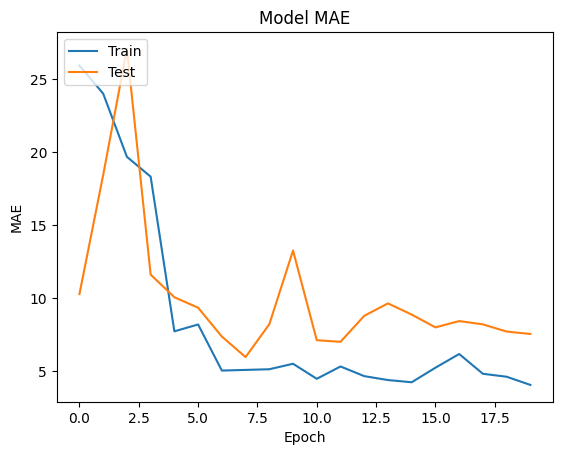

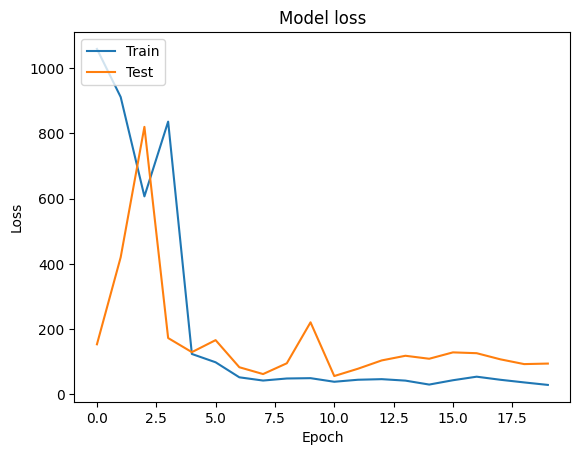

1/1 [==============================] - 0s 294ms/step


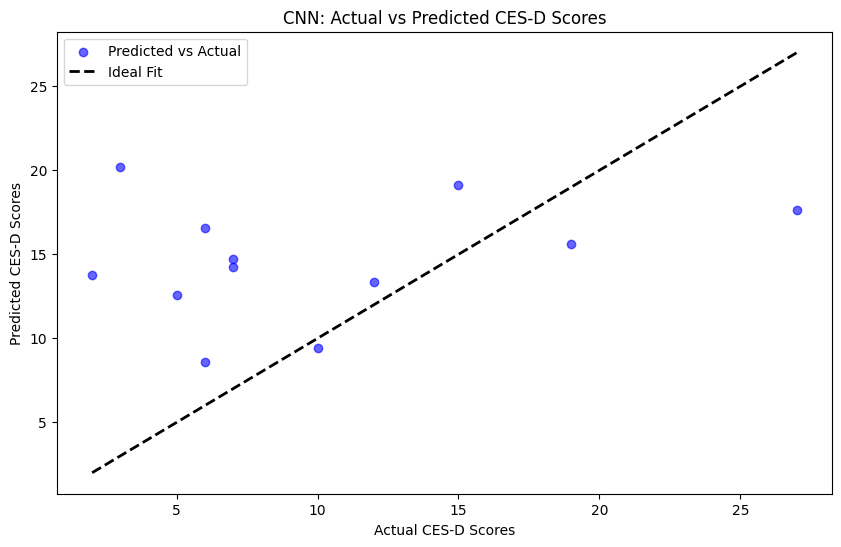

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_mri_data, all_severity_scores, test_size=0.2, random_state=42)

# Define the CNN model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Dropout(0.25),

        Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Dropout(0.25),

        Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling3D(pool_size=(2, 2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='linear')  # Assuming regression output for severity prediction
    ])
    return model

# Build and compile the model
model = build_cnn_model(X_train.shape[1:])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model with reduced batch size
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=2, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Predict and plot
predictions = model.predict(X_test)

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual CES-D Scores')
plt.ylabel('Predicted CES-D Scores')
plt.title('CNN: Actual vs Predicted CES-D Scores')
plt.legend()
plt.show()

Result Interpretation
1. The training loss represents how well the model is fitting the training data. A consistently decreasing training loss means the model is working
2. The validation loss represents how well the model is fitting the unseen data. It should decrease and stablize
3. The MAE value indicates the average magnitude of the errors. We have Mean Absolute Error (MAE): 6.952949523925781 for current CNN model.
4. The Scatter plot visualizes how well the predicted scores align with the actual scores. From the Scatter plot, we can see that the predicted result is within acceptable range within the actual reuslt.

## Statistical Tests

To begin, we will conduct some t-tests to test the statistical significance of the change in CES-D score in response to the intervention (running). In our case, we will only be focusing on the male participants. We will also be taking a different approach than the study form which this data originated by using a control sample. The statistic we will be measuring is the change in CES-D score between sessions. Our control sample will be the change in group 2's CES-D score between the first and second session. Group 2 did not receive an intervention between session 1 and session2. For all tests we will be using a significance level of `alpha = 0.05`

In [ ]:
import scipy.stats
# control sample
control = np.array(group2_severity_df['CES-D_2'] - group2_severity_df['CES-D_1'])
control.mean()

1.0

This means that for our sample, the CES-D_2 score increases by 1 on average with no intervention.

### Test 1: Effectiveness of Intervention

The first t-test we will do will be testing the effectiveness of the intervention on group 1 compared to the control (group 2). The measure we will be testing is the change in CES-D between session 1 and session 2 (running happened in between). Our null hypothesis is that the change in CES-D is the same as the control. Our alternate hypothesis is that there is a decrease in CES-D after running. We will be performing a 2-sample t-test for independent samples.

In [ ]:
# compute metric
h1 = np.array(group1_severity_df['CES-D_2'] - group1_severity_df['CES-D_1'])
h1.mean()

-1.7777777777777777

In [ ]:
# compute test statistic
t_test1 = scipy.stats.ttest_ind(h1, control, alternative='less')
t_test1

Ttest_indResult(statistic=-1.4908445104021752, pvalue=0.07716200031431762)

A p-value of 0.07 upholds the null hypothesis: the intervention is not effective. HOWEVER, it is very close to 0.05, meaning it is somewhat reasonable to believe that the intervention worked. The researchers of the original paper found statistically significant results, so it could be due to the fact that we are using a smaller sample size (only men), and using a control group.

### Test2: Persistence of Intervention

Now we will test if the intervention, continued to lower depression scores long after the intervention took place. We can measure this by finding the change in CES-D score between session 2 and 3 of group 1. Our null hypothesis states that the change in score is the same as the control, our alternate hypothesis states that the change is less than the control.

In [ ]:
# compute metric
h2 = np.array(group1_severity_df['CES-D_3'] - group1_severity_df['CES-D_2'])
h2.mean()

1.5555555555555556

In [ ]:
# compute t-test
ttest_2 = scipy.stats.ttest_ind(h2, control, alternative='less')
ttest_2

Ttest_indResult(statistic=0.3230020465474504, pvalue=0.624683641572419)

A p-value of 0.62 indicates the null hypothesis is true. In fact, there was an increase in CES-D scores, upholding the original study's finding that scores increased long after the intervention.

### Test 3: Effectiveness of Intervention (Paired)

For this t-test we will be performing a paired t-test to test the effectiveness of the intervention for group 2. between session 1 and 2, group 2 did nothing, meaning the change in CES-D scores for this interval is our control. Between session 2 and 3 however, the intervention occoured, meaning we can perform a paired-t test between the changes of these to intervals to futher test the intervention's effectiveness. Our null hypothesis is that the change in score between session 1 and 2 is the same as the change in score between session 2 and 3. Our alternative hypothesis is that the change in score between session 2 and 3  is less than the change in score between session 1 and 2.

In [ ]:
# compute metric
h3 = np.array(group2_severity_df['CES-D_3'] - group2_severity_df['CES-D_2'])
h3.mean()

-2.8

In [ ]:
# t-test
ttest_3 = scipy.stats.ttest_rel(h3, control, alternative='less')
ttest_3

TtestResult(statistic=-1.4746859988420322, pvalue=0.08719878168016626, df=9)

A p-value of 0.08 upholds the null hypothesis. However, same with the first test, there is some evidence to suggest the intervention is effective.

## **Changes** in Brain Structure Associated with **Changes** in Depression Severity

This next section aims to answer the following question:  **are there specific changes in brain structure that are associated with changes in depression severity?** We can answer this by building a linear regression model that predicts the change in CES-D score based on differences in brain strcuture. Exaiming the coefficents of the fitted model will show us how differences in mass of parts of the brain are associated with differences in CES-D scores. The data for this will be from both groups, measuring differences between all consecutive brain scans (meaning we will measure difference between group 1 session 2 and session 3, but not group 1 session 1 and session 3).

### Load and Transform Data

In [ ]:
# get corresponding differences in CES-D
g1d1_d = np.array(group1_severity_df['CES-D_2'] - group1_severity_df['CES-D_1'])
g1d2_d = np.array(group1_severity_df['CES-D_3'] - group1_severity_df['CES-D_2'])

g2d1_d = np.array(group2_severity_df['CES-D_2'] - group2_severity_df['CES-D_1'])
g2d2_d = np.array(group2_severity_df['CES-D_3'] - group2_severity_df['CES-D_2'])

In [ ]:
# load in all data
g1s1_data = [nib.load(p) for p in group1_session1_mri]

g1s2_data = [nib.load(p) for p in group1_session2_mri]

g1s3_data = [nib.load(p)for p in group1_session3_mri]

g2s1_data = [nib.load(p) for p in group2_session1_mri]

g2s2_data = [nib.load(p) for p in group2_session2_mri]

g2s3_data = [nib.load(p) for p in group2_session3_mri]

The following cells are very time and compute intenstive to run, so we have loaded the result of this processing into a file, which we will load from the disk instead of computing it directly. The code to genereate the file is shown below:

```python
from nilearn.image import load_img, resample_to_img
```

```python
# resample images relative to reference image
reference_img = load_img(group1_session1_mri[0])

g1s1_data = [resample_to_img(img, reference_img) for img in g1s1_data]
g1s2_data = [resample_to_img(img, reference_img) for img in g1s2_data]
g1s3_data = [resample_to_img(img, reference_img) for img in g1s3_data]
g2s1_data = [resample_to_img(img, reference_img) for img in g2s1_data]
g2s2_data = [resample_to_img(img, reference_img) for img in g2s2_data]
g2s3_data = [resample_to_img(img, reference_img) for img in g2s3_data]
```

```python
# concatenate all images for standardization
full_data = g1s1_data + g1s2_data + g1s3_data + g2s1_data + g2s2_data + g2s3_data
```

```python
from nilearn.input_data import NiftiMasker
```

```python
# concatenate all images for standardization
full_data = g1s1_data + g1s2_data + g1s3_data + g2s1_data + g2s2_data + g2s3_data
# create model for flattening and standardizing images
masker = NiftiMasker(mask_strategy='background', standardize=True)
masker.fit(full_data)
```

```python
# flatten and standardize
g1s1_data = masker.transform(g1s1_data)
g1s2_data = masker.transform(g1s2_data)
g1s3_data = masker.transform(g1s3_data)
g2s1_data = masker.transform(g2s1_data)
g2s2_data = masker.transform(g2s2_data)
g2s3_data = masker.transform(g2s3_data)
```

```python
# calculate differences
g1d1 = g1s2_data - g1s1_data
g1d2 = g1s3_data - g1s2_data

g2d1 = g2s2_data - g2s1_data
g2d2 = g2s3_data - g2s2_data
```

```python
# combine all arrays
all_mri_diffs = np.vstack([g1d1, g1d2, g2d1, g2d2])
# reshape if needed
all_mri_diffs_shaped = all_mri_diffs.reshape(all_mri_diffs.shape[0], -1)
```

```python
# save data
np.save('mri_diffs.npy', all_mri_diffs_shaped)
```

In [ ]:
# load data from file
with open('mri_diffs.npy', 'rb') as f:
    all_mri_diffs_shaped = np.load(f)

all_mri_diffs_shaped.shape

(38, 14680064)


WOWZERS! Only 38 observations, and over 14 million features. Before we fit a regression model, we must first reduce the dimensionality of this data. To do that we will use PCA. We will reduce 14 million features to just 20!

### Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
import pickle

The following cell takes a very long time (and over 25GB of system memory) to run, so we have precomputed the result and will load it back in with `pickle`!

```python
pca1 = PCA(n_components=20, random_state=0)
pca1.fit(all_mri_diffs_shaped)
with open('pca1.pkl') as f:
    pickle.dump(pca1, f)
```

In [ ]:
# load in pca
with open('pca1.pkl', 'rb') as f:
    pca1 = pickle.load(f)

/Users/valen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.2.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# reduce the data to (38, 20)
reduced_data = pca1.transform(all_mri_diffs_shaped)
reduced_data.shape

(38, 20)

Now we have reduced our data to just 20 features! Below we will show the total proportion of explained variance from all of our components.

In [ ]:
sum(pca1.explained_variance_ratio_)

0.8274228144811113

This means 82% of the variance is explained by our components, meaning by reducing the dimensionality, we are only losing 18% of the total information!

Now we will visualize our components:

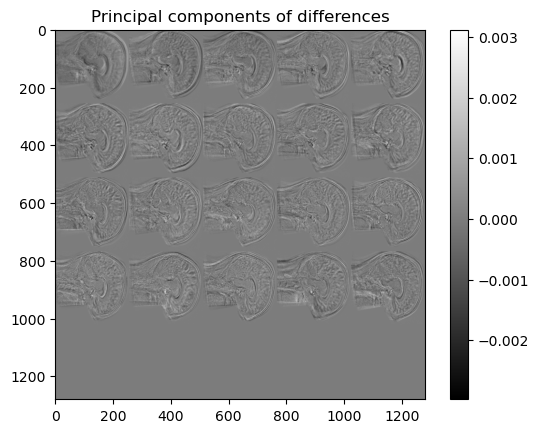

In [ ]:
from skimage.util import montage
comps = pca1.components_
comps_shaped = comps.reshape(20, 224, 256, 256)
all_comps_mont = montage(comps_shaped[:, 101])
plt.imshow(all_comps_mont, cmap='gray')
plt.colorbar()
plt.title('Principal components of differences')
plt.show()

### Regression

Our next step is to perform regression on our reduced data, and exaimine the coefficents to see how features can precict the change in CES-D score. We use lasso regression (cross validated) here so that only a select number of features influence the output, while the rest are set to zero.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
# get y (difference in CES-D scores)
y = np.hstack([g1d1_d, g1d2_d, g2d1_d, g2d2_d])
y.shape

(38,)

In [ ]:
# set regressor and fit
reg = LassoCV(cv=5, random_state=0).fit(reduced_data, y)

In [ ]:
# coefficents
reg.coef_

array([ 0.00000000e+00,  3.85221527e-06, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.71986966e-06,  0.00000000e+00, -5.97354772e-07,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.81135356e-07,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.91775367e-06,
       -7.40070977e-06, -1.19499845e-05,  0.00000000e+00, -3.45056630e-06])

In [ ]:
# find indexes of largest (absolute) coefficents
np.abs(reg.coef_).argsort()

array([ 0, 14, 13, 12, 10, 18,  8,  9,  6,  4,  3,  2, 11,  7,  5, 19,  1,
       15, 16, 17])

Looks like the components that have the largest influence on the CES-D score are 1, 15, 16, and 17. Let's take a closer look at the coeffiecents:

In [ ]:
# index coefficents
comp_idxs = [1, 15, 16, 17]
reg.coef_[comp_idxs]

array([ 3.85221527e-06,  6.91775367e-06, -7.40070977e-06, -1.19499845e-05])

It seems that the first 2 are associated with an increase in CES-D score, last 2 are associated with a decrease in the CES-2 score, lets visualize a slice of these components:

In [ ]:
# subset components
comps_subset = comps_shaped[comp_idxs]

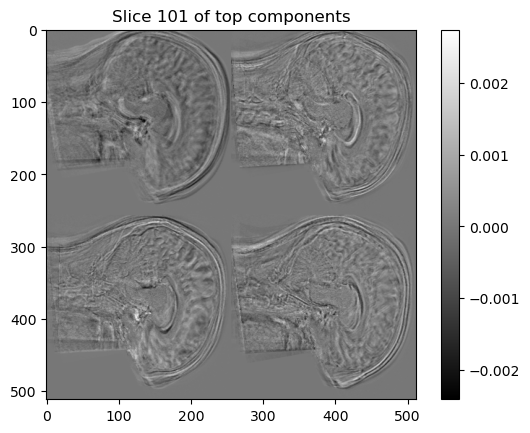

In [ ]:
# visualize slice 101 of components
from skimage.util import montage
vis = montage(comps_subset[:, 101])

plt.imshow(vis, cmap='gray', norm='linear')
plt.colorbar()
plt.title('Slice 101 of top components')
plt.show()



Exaimining the top left slice, we can see a dark spot around the center of the image. In the bottom left slice, we can see a light spot in a similar area. Remember these are differences, so white means an increase in mass, and black means a decrease in mass. As a reminder the top left has a positive coefficent, while the bottom left has a negative coefficent. The hotspots may be hard to see with this visualization, so below is a visualization of the absolute values of the top components:

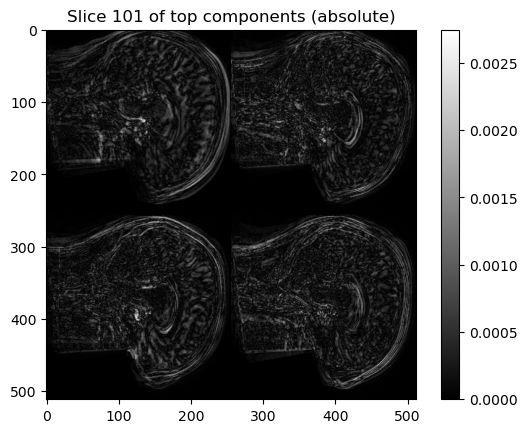

In [ ]:
# visualize slice 101 of components (absolute)

from skimage.util import montage
vis = montage(comps_subset[:, 101])

plt.imshow(np.abs(vis), cmap='gray', norm='linear')
plt.colorbar()
plt.title('Slice 101 of top components (absolute)')
plt.show()


Look! The hotspots are way more visible in this visualization. So what does this mean?

### Analysis

2 principal components were found to be associated with changes in depression score that showed meaningful associations with regions in the brain. Both components are associated with changes in mass of what we believe is the hippocampus. The first component showed a decrease in hippocampus mass, and was associated with an increase in CES-D score. The second component showed an increase in hippocampus mass, and was associated with an decrease in depression score. From this, we may conclude that the mass of the hippocampus is **inversely correlated** with depression severity. Meaning, an increase in hippocampus mass may be associated with a decrease in depression severity, and vice versa.

However, this conclusion is limited. Due to the small sample size, this conclusion is not backed by a lot of evidence. This conclusion is based on qualitative observation of images and not quantitiave measurements of hippocampus mass. Finally, the coeffiecents of our lasso regression are quite small. This could be due to our regularization factor, but it may indicate that the difference in brain structure has little predictive power for depression severity.

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.

**Discussion**

By looking at the visualizations, we can see clear reductions in CES-D scores during each group's training period. In group 1, we can see a reduction in CES-D scores between time points 1 and 2, while group 2 has a reduction in CES-D scores between time points 2 and 3. As predicted, we can also see an increase in scores during the downtime of each group. The density of group 1 CES-D scores slowly increase during the time points 2 and 3; similarly, group 2 CES-D scores increased during the time points 1 and 2. This is supported by the persistence of intervention tests in data analysis. In summary, the interpretation of the results yield that although the p values showed that running intervention did not trend towards a reduction in scores, we can see that there is an observed trend in lower CES-D scores. This is similar to what the original study found based on the same data.

The first hypothesis is that if we can predict CES-D scores by using just MRI 3D image information. The linear regression model was first used to predict CES-D scores from MRI data. However, it seemed that there was no linear relationship between MRI data and CES-D scores. Then, the Convolutional Neural Network (CNN) model was used to predict CES-D scores from MRI data. The training and validation loss plots show that the model was moderately successful in learning patterns related to depression severity. The scatter plot of actual vs. predicted CES-D scores indicates some predictive accuracy.

In our study, we employed Convolutional Neural Networks (CNN) and linear regression to predict CES-D scores from MRI data of male participants. However, both approaches faced significant challenges. The CNN model, despite its capability to capture spatial hierarchies in volumetric data, struggled due to the limited sample size (57 MRI scans), leading to overfitting and poor generalization. The model's complexity requires a large amount of data to learn effectively, and the insufficient sample size hampers its performance. On the other hand, linear regression, while simpler and less prone to overfitting with small datasets, lacks the capacity to capture the complex, non-linear relationships present in MRI data, resulting in suboptimal predictions.

The poor performance of both models highlights a fundamental issue: the scarcity of available MRI scans in relation to the severity scores of Major Depressive Disorder (MDD). This data limitation constrains the model’s ability to generalize and make accurate predictions. To address this, our future plans involve acquiring more comprehensive datasets to enhance the model's training and validation processes. We also plan to explore advanced data augmentation techniques to synthetically increase the variability and size of our dataset. Additionally, incorporating transfer learning from pre-trained models on similar tasks could leverage existing knowledge and improve performance. By expanding our dataset and employing more sophisticated techniques, we aim to develop a more robust predictive model for CES-D scores based on MRI data.

The second hypothesis testing is that if the statistical significance of the change in CES-D score in response to the intervention (running). As for the MRI scans, there is a very slight increase in volume for group 1 between session 1 and session 2. While miniscule, this increase in size near the hippocampal area is indicative of decreased feelings of depression. Applying PCA and reducing dimensions. Four of the most influential CES-D scores were selected from the sorted regression coefficients. From this, we can see slight hotspots occuring in the second component slice containing the largest positive coefficient.

**Limitations**


*Sample Size*

Although certain trends regarding increased hippocampus mass and decreased depression severity, the results were not able to achieve significance. We did not get below the threshold of 0.05 for our p-value, but our result, 0.07, is relatively near. This calculation may have been affected by a considerable reduction in sample size and entries from group 2.

*Subjectivity and bias*

Another limitation could be the subjectivity of the CES-D scores, in which patients could have different perceptions or scales of depression, as well as level of honesty.

*Quality of life*

There is also no mention of previous quality of life, other than the amount of exercise each participant gets on average.


*Short term study*

The study is very short term when discussing depression and the effects of exercise. Long-term effects are not measured and no follow up after the study occurs (study length was 2 weeks).

**Additional studies**


*Intervention change*

One additional study would be to change the method of intervention. By changing this variable, we can set the intensity levels of varying degrees such as yoga, meditation, or Cognitive Behaviorial Therapy (CBT). The same could be said about the duration of the intervention.

*External lifestyle variables*

Another study could keep a strict record of other external variables such as a diet or sleep log in order to investigate different influential lifestyle factors. In doing so, it is possible to gain a more significant result with more extensive data.

*Length of study*

By changing the length of the longitudinal study to a more extensive period, it is possible to observe the long-term effects of exercise and severity depression. Repeated CES-D assessments and MRI scans would give a better trend, especially for the regression models. This would be mainly helpful because fMRIs are difficult for test subjects in motion.
